In [1]:
import matplotlib.pyplot as plt
import numpy as np

import fnmatch
import os
import pickle

os.chdir('/Users/qdo/noninjected1_11/')
data = []
timestamps = []
for subdir,dirs,files in sorted(os.walk('.')):
    #print(dirs)
    for file in sorted(files):
        if fnmatch.fnmatch(file, '202*') and not fnmatch.fnmatch(file, '*_split'):
            print(file)
            fullpath = os.path.join(subdir,file)
            with open(fullpath,'rb') as f:
                data.append(pickle.load(f))
                timestamps.append(str(file))

data0 = np.concatenate(data, axis=1)
del data

os.chdir('/Users/qdo/noninjected12_1/')
data = []
timestamps = []
for subdir,dirs,files in sorted(os.walk('.')):
    #print(dirs)
    for file in sorted(files):
        if fnmatch.fnmatch(file, '2022-*') and not fnmatch.fnmatch(file, '*_split'):
            print(file)
            fullpath = os.path.join(subdir,file)
            with open(fullpath,'rb') as f:
                data.append(pickle.load(f))
                timestamps.append(str(file))
                
data1 = np.concatenate(data, axis=1)
del data

os.chdir('/Users/qdo/noninjected12_8/')
data = []
timestamps = []
for subdir,dirs,files in sorted(os.walk('.')):
    #print(dirs)
    for file in sorted(files):
        if fnmatch.fnmatch(file, '2022-*') and not fnmatch.fnmatch(file, '*_split'):
            print(file)
            fullpath = os.path.join(subdir,file)
            with open(fullpath,'rb') as f:
                data.append(pickle.load(f))
                timestamps.append(str(file))
#data1 = data[16]
#num_samples = data1[0,:].size

data2 = np.concatenate(data, axis=1)
del data



#os.chdir('/Users/qdo/injected12_9/')
#data = []
#timestamps = []
#for subdir,dirs,files in sorted(os.walk('.')):
    #print(dirs)
#    for file in sorted(files):
#        if fnmatch.fnmatch(file, '2022-*') and not fnmatch.fnmatch(file, '*_split'):
#            print(file)
#            fullpath = os.path.join(subdir,file)
#            with open(fullpath,'rb') as f:
#                data.append(pickle.load(f))
#                timestamps.append(str(file))
#data3 = np.concatenate(data, axis=1)
#del data


#os.chdir('/Users/qdo/injected12_15/')
#data = []
#timestamps = []
#for subdir,dirs,files in sorted(os.walk('.')):
    #print(dirs)
#    for file in sorted(files):
#        if fnmatch.fnmatch(file, '2022-*') and not fnmatch.fnmatch(file, '*_split'):
#            print(file)
#            fullpath = os.path.join(subdir,file)
#            with open(fullpath,'rb') as f:
#                data.append(pickle.load(f))
#                timestamps.append(str(file))
#data4 = np.concatenate(data, axis=1)
#del data


#os.chdir('/Users/qdo/injected12_7/')
#data = []
#timestamps = []
#for subdir,dirs,files in sorted(os.walk('.')):
    #print(dirs)
#    for file in sorted(files):
#        if fnmatch.fnmatch(file, '2022-*') and not fnmatch.fnmatch(file, '*_split'):
#            print(file)
#            fullpath = os.path.join(subdir,file)
#            with open(fullpath,'rb') as f:
#                data.append(pickle.load(f))
#                timestamps.append(str(file))
#data5 = np.concatenate(data, axis=1)
#del data


2023-01-11 12:59:04.096037
2023-01-11 13:59:04.096035
2023-01-11 14:59:04.096034
2023-01-11 15:59:04.096022
2022-12-01 12:59:03.793030
2022-12-01 13:59:03.846033
2022-12-01 14:59:03.846039
2022-12-01 15:59:03.846082
2022-12-08 12:59:03.374027
2022-12-08 13:59:03.374034
2022-12-08 14:59:03.374034
2022-12-08 15:59:03.374081


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

In [3]:
from scipy import signal
import mne
def processData(data):
    eeg = ((data[0,:]-2)*1000).reshape(-1) 
    eeg=signal.detrend(eeg)
    sf = 1000.
    times = np.arange(eeg.size)/sf
    # Plot the signal
    emg = ((data[1,:]-2)*1000).reshape(-1) 
    sf = 1000.
    lab1 = ((data[4,:])).reshape(-1) 
    sf = 1000.
    lab2 = ((data[5,:])).reshape(-1) 
    label = np.zeros_like(lab1)
    first_flash = 0
    flashcount = 0
    for i in range(0,len(lab1)):
        if (lab1[i] == 0) and (lab2[i] == 0):
            label[i] = 1
        elif (lab1[i] == 0) and (lab2[i] > 0):
            label[i] = 2
        elif (lab1[i] > 0) and (lab2[i] == 0):
            label[i] = 3
            first_flash = 1
        else:
            if (first_flash == 1) and (flashcount ==0): 
                label[i] = 4
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    first_flash = 0
                    flashcount = flashcount + 1
            elif (flashcount == 1):
                label[i] = 5            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 2):
                label[i] = 6            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 3):
                label[i] = 7            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 4):
                label[i] = 8            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 5):
                label[i] = 9            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 6):
                label[i] = 10            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 7):
                label[i] = 11            
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 8):
                label[i] = 12           
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            elif (flashcount == 9):
                label[i] = 13          
                if (lab1[i+1] == 0) and (lab2[i+1] == 0):
                    flashcount = flashcount + 1
            else:
                label[i] = 14   
                flashcount = 0
    n_channels = 2
    sampling_freq = 1000  # in Hertz
    info = mne.create_info(n_channels, sfreq=sampling_freq)
    #print(info)
    ch_names = ['EEG001','STIM1'] 
    ch_types = ['eeg','stim']
    info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
    #print(info)
    info['description'] = 'My custom dataset'
    #print(info)
    rawdata= np.array([eeg/1000000,label])
    simulated_raw = mne.io.RawArray(rawdata, info)
    raw_downsampled = simulated_raw.copy().resample(sfreq=200)
    return raw_downsampled

In [4]:
d0 = processData(data0)
del data0
d1 = processData(data1)
del data1
d2 = processData(data2)
del data2
#d3 = processData(data3)
#del data3
#d4 = processData(data4)
#del data4
#d5 = processData(data5)
#del data5

Creating RawArray with float64 data, n_channels=2, n_times=14396004
    Range : 0 ... 14396003 =      0.000 ... 14396.003 secs
Ready.
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
1824 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14]
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
1823 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14]


</Users/qdo/opt/anaconda3/lib/python3.7/site-packages/decorator.py:decorator-gen-342>:12: RuntimeWarning: Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.


Creating RawArray with float64 data, n_channels=2, n_times=14397004
    Range : 0 ... 14397003 =      0.000 ... 14397.003 secs
Ready.
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
1522 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14]
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
1520 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14]
Creating RawArray with float64 data, n_channels=2, n_times=14396004
    Range : 0 ... 14396003 =      0.000 ... 14396.003 secs
Ready.
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
1050 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14]
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
1049 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14]


</Users/qdo/opt/anaconda3/lib/python3.7/site-packages/decorator.py:decorator-gen-342>:12: RuntimeWarning: Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.


In [6]:
events0 = mne.find_events(d0, stim_channel=['STIM1'],shortest_event=1,min_duration=0.01,initial_event=True,consecutive=True)
event_dict = {'choice':2,
             'stim1':4,
              'stim2':5,
              'stim3':6,
              'stim4':7,
              'stim5':8,
              'stim6':9,
              'stim7':10,
              'stim8':11,
             'stim9':12,
              'stim10':13,
             'center':3}
events0 = mne.merge_events(events0, [5,6,7,8,9,10,11,12,13], 14)

event_dict = {'choice':2,
              'stimall':14,
             'center':3}

epochs0 = mne.Epochs(d0, events0,event_id=event_dict, tmin=-0.01, tmax=1, preload=True,event_repeated='drop')
f0_evoked_d0 = epochs0['stimall'].average()

3467 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Not setting metadata
1678 matching events found
Setting baseline interval to [-0.01, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1678 events and 203 original time points ...
0 bad epochs dropped


In [5]:
events0 = mne.find_events(d0, stim_channel=['STIM1'],shortest_event=1,min_duration=0.01,initial_event=True,consecutive=True)
event_dict = {'choice':2,
             'stim1':4,
              'stim2':5,
              'stim3':6,
              'stim4':7,
              'stim5':8,
              'stim6':9,
              'stim7':10,
              'stim8':11,
             'stim9':12,
              'stim10':13,
             'center':3}
events0 = mne.merge_events(events0, [5,6,7,8,9,10,11,12,13], 14)

event_dict = {'choice':2,
              'stimall':14,
             'center':3}

epochs0 = mne.Epochs(d0, events0,event_id=event_dict, tmin=-0.01, tmax=1, preload=True,event_repeated='drop')
f0_evoked_d0 = epochs0['stimall'].average()

events1 = mne.find_events(d1, stim_channel=['STIM1'],shortest_event=1,min_duration=0.01,initial_event=True,consecutive=True)
#events1 = mne.merge_events(events1, [5,6,7,8,9,10,11,12,13], 14)

#fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=d1.info['sfreq'],
#                          first_samp=d1.first_samp)
epochs1 = mne.Epochs(d1, events1,event_id=event_dict, tmin=-0.01, tmax=1, preload=True,event_repeated='drop')
epochs1['stimall'].plot_image(picks=['EEG001'])
f1_evoked_d1 = epochs1['stimall'].average()

#mne.viz.plot_compare_evokeds(dict(f1=f1_evoked, f2=f2_evoked,f3=f3_evoked,f4=f4_evoked),
#                             legend='upper right')
events2 = mne.find_events(d2, stim_channel=['STIM1'],shortest_event=1,min_duration=0.01,initial_event=True,consecutive=True)
events2 = mne.merge_events(events2, [5,6,7,8,9,10,11,12,13], 14)

#fig = mne.viz.plot_events(events2, event_id=event_dict, sfreq=d2.info['sfreq'],
#                          first_samp=d2.first_samp)
epochs2 = mne.Epochs(d2, events2,event_id=event_dict, tmin=-0.01, tmax=1, preload=True,event_repeated='drop')
epochs2['center'].plot_image(picks=['EEG001'])
f2_evoked_d2 = epochs2['stimall'].average()

#events3 = mne.find_events(d3, stim_channel=['STIM1'],shortest_event=1,min_duration=0.01,initial_event=True,consecutive=True)
#events3 = mne.merge_events(events3, [5,6,7,8,9,10,11,12,13], 14)

#fig = mne.viz.plot_events(events3, event_id=event_dict, sfreq=d3.info['sfreq'],
#                          first_samp=d3.first_samp)
#epochs3 = mne.Epochs(d3, events3,event_id=event_dict, tmin=-0.01, tmax=1, preload=True,event_repeated='drop')

#f3_evoked_d3 = epochs3['center'].average()


#events4 = mne.find_events(d4, stim_channel=['STIM1'],shortest_event=1,min_duration=0.01,initial_event=True,consecutive=True)
#events4 = mne.merge_events(events4, [5,6,7,8,9,10,11,12,13], 14)
#epochs4 = mne.Epochs(d4, events4,event_id=event_dict, tmin=-0.01, tmax=1, preload=True,event_repeated='drop')
#f4_evoked_d4 = epochs4['center'].average()


#events5 = mne.find_events(d5, stim_channel=['STIM1'],shortest_event=1,min_duration=0.01,initial_event=True,consecutive=True)
#events5 = mne.merge_events(events5, [5,6,7,8,9,10,11,12,13], 14)
#epochs5 = mne.Epochs(d5, events5,event_id=event_dict, tmin=-0.01, tmax=1, preload=True,event_repeated='drop')
#f5_evoked_d5 = epochs5['center'].average()

3467 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Not setting metadata
1678 matching events found
Setting baseline interval to [-0.01, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1678 events and 203 original time points ...
0 bad epochs dropped
2899 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


ValueError: No matching events found for stimall (event id 14)

Not setting metadata
1314 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-7-6d4744bd9307>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs0['stimall'].plot_image(picks=['EEG001'])


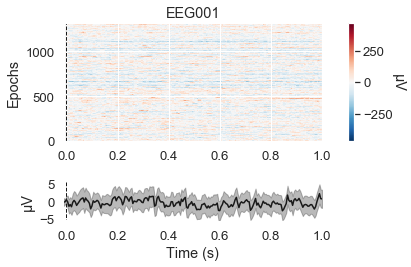

[<Figure size 432x288 with 3 Axes>]

In [7]:
epochs0['stimall'].plot_image(picks=['EEG001'])

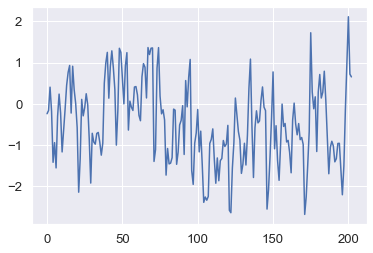

In [8]:
z = 1000000*f0_evoked_d0.get_data(picks='eeg')
#print(z.shape)
#a = 1000000*f1_evoked_d1.get_data(picks='eeg')
#print(a.shape)
#b = 1000000*f2_evoked_d2.get_data(picks='eeg')
#print(b.shape)

#plt.figure(figsize=(20, 10))
plt.plot((z[0,:]))
plt.show()


In [ ]:
z = 1000000*f0_evoked_d0.get_data(picks='eeg')
print(z.shape)
a = 1000000*f1_evoked_d1.get_data(picks='eeg')
print(a.shape)
b = 1000000*f2_evoked_d2.get_data(picks='eeg')
print(b.shape)
c = 1000000*f3_evoked_d3.get_data(picks='eeg')
print(c.shape)
d = 1000000*f4_evoked_d4.get_data(picks='eeg')
print(d.shape)
e = 1000000*f5_evoked_d5.get_data(picks='eeg')
print(e.shape)
plt.figure(figsize=(20, 10))
plt.plot(z[0,:],label='non-inj0')
plt.plot(a[0,:],label='non-inj1')
plt.plot(b[0,:],label='non-inj2')
plt.plot(c[0,:],label='clonidine1')
plt.plot(d[0,:],label='clonidine2')
plt.plot(e[0,:],label='clonidine3')
plt.legend()
plt.show()

plt.figure()
plt.plot((z[0,:]+a[0,:] + b[0,:])/3,label='combined_non-inj')
#plt.plot(a[0,:],label='non-inj1')
#plt.plot(b[0,:],label='non-inj2')
plt.plot((c[0,:]+d[0,:]+e[0,:])/3,label='combined_clonidine')
#plt.plot(d[0,:],label='clonidine2')
#plt.plot(e[0,:],label='clonidine3')
plt.legend()
plt.show()
#t = np.arange(0, 141, 1, dtype=int)
#b = np.transpose(a)
#print(a.shape)
#print(t.shape)
#a = np.squeeze(a)
#print(np.shape(a))
#s = np.stack((t,np.squeeze(b)))
#s = np.transpose(s)
#print(s.shape)
#import pandas as pd
#df = pd.DataFrame(s, columns = ['time','eeg'])

#df.set_index('time',inplace=True)
#df.index=pd.to_datetime(df.index)


from statsmodels.tsa.seasonal import seasonal_decompose
series0 = np.transpose(z)
series1 = np.transpose(a)
series2 = np.transpose(b)
series3 = np.transpose(c)
series4 = np.transpose(d)
series5 = np.transpose(e)


In [ ]:
result0 = seasonal_decompose(series0, model='additive',period=25)
result1 = seasonal_decompose(series1, model='additive',period=25)
result2 = seasonal_decompose(series2, model='additive',period=25)
result3 = seasonal_decompose(series3, model='additive',period=25)
result4 = seasonal_decompose(series4, model='additive',period=25)
result5 = seasonal_decompose(series5, model='additive',period=25)


fig, ax = plt.subplots(4, 1, figsize=(25, 10),sharex=True)
ax[0].plot(np.arange(0,2,2/203),result0.observed,label='non-inj0')
ax[0].plot(np.arange(0,2,2/203),result1.observed,label='non-inj1')
ax[0].plot(np.arange(0,2,2/203),result2.observed,label='non-inj2')
ax[0].plot(np.arange(0,2,2/203),result3.observed,label='clonidine1')
ax[0].plot(np.arange(0,2,2/203),result4.observed,label='clonidine2')
ax[0].plot(np.arange(0,2,2/203),result5.observed,label='clonidine3')

ax[1].plot(np.arange(0,2,2/203),result0.trend,label='non-inj0')
ax[1].plot(np.arange(0,2,2/203),result1.trend,label='non-inj1')
ax[1].plot(np.arange(0,2,2/203),result2.trend,label='non-inj2')
ax[1].plot(np.arange(0,2,2/203),result3.trend,label='clonidine1')
ax[1].plot(np.arange(0,2,2/203),result4.trend,label='clonidine2')
ax[1].plot(np.arange(0,2,2/203),result5.trend,label='clonidine3')

ax[2].plot(np.arange(0,2,2/203),result0.seasonal,label='non-inj0')
ax[2].plot(np.arange(0,2,2/203),result1.seasonal,label='non-inj1')
ax[2].plot(np.arange(0,2,2/203),result2.seasonal,label='non-inj2')
ax[2].plot(np.arange(0,2,2/203),result3.seasonal,label='clonidine1')
ax[2].plot(np.arange(0,2,2/203),result4.seasonal,label='clonidine2')
ax[2].plot(np.arange(0,2,2/203),result5.seasonal,label='clonidine3')

ax[3].plot(np.arange(0,2,2/203),result0.resid,label='non-inj0')
ax[3].plot(np.arange(0,2,2/203),result1.resid,label='non-inj1')
ax[3].plot(np.arange(0,2,2/203),result2.resid,label='non-inj2')
ax[3].plot(np.arange(0,2,2/203),result3.resid,label='clonidine1')
ax[3].plot(np.arange(0,2,2/203),result4.resid,label='clonidine2')
ax[3].plot(np.arange(0,2,2/203),result5.resid,label='clonidine3')


ax[0].set_ylabel('evoked eeg')
ax[2].set_ylabel('flashes')
ax[1].set_ylabel('trend')
ax[3].set_ylabel('residual')
ax[3].set_xlabel('t(s)')
#ax[3].legend()
plt.show()


In [ ]:
result0 = seasonal_decompose((series0+series1+series2)/3, model='additive',period=18)
result3 = seasonal_decompose((series3+series4+series5)/3, model='additive',period=18)

fig, ax = plt.subplots(4, 1, figsize=(25, 10),sharex=True)
ax[0].plot(np.arange(0,2,2/203),result0.observed,label='non-inj0')
ax[0].plot(np.arange(0,2,2/203),result3.observed,label='clonidine3')

ax[1].plot(np.arange(0,2,2/203),result0.trend,label='non-inj0')
ax[1].plot(np.arange(0,2,2/203),result3.trend,label='clonidine3')

ax[2].plot(np.arange(0,2,2/203),result0.seasonal,label='non-inj0')
ax[2].plot(np.arange(0,2,2/203),result3.seasonal,label='clonidine3')

ax[3].plot(np.arange(0,2,2/203),result0.resid,label='non-inj0')
ax[3].plot(np.arange(0,2,2/203),result3.resid,label='clonidine3')


ax[0].set_ylabel('evoked eeg')
ax[2].set_ylabel('flashes')
ax[1].set_ylabel('trend')
ax[3].set_ylabel('residual')
ax[3].set_xlabel('t(s)')
#ax[3].legend()
plt.show()


In [ ]:
result0 = seasonal_decompose(series0, model='additive',period=25)
result1 = seasonal_decompose(series1, model='additive',period=25)
result2 = seasonal_decompose(series2, model='additive',period=25)
result3 = seasonal_decompose(series3, model='additive',period=25)
result4 = seasonal_decompose(series4, model='additive',period=25)
result5 = seasonal_decompose(series5, model='additive',period=25)

from scipy.signal import argrelextrema
def getLatencyandValue(a):
    max_ind = argrelextrema(a, np.greater)
# get the actual values using these indices
    r = a[max_ind]  # array([5, 3, 6])
    #print(r)
    #print(max_ind)
    max_ind = np.asarray(max_ind[0])
    #print(max_ind)
    loc = np.argmax(r)
    #print(loc)
    latency = max_ind[loc]
    value = r[loc]
    #print(latency)
    #print(value)
    return latency,value
def getPeaks(a):
    max_ind = argrelextrema(a, np.greater)
    r = a[max_ind]  # array([5, 3, 6])
    max_ind = np.asarray(max_ind[0])
    return r,max_ind
# determine the indices of the local maxima
l0,v0 = getLatencyandValue(result0.trend)
l1,v1 = getLatencyandValue(result1.trend)
l2,v2 = getLatencyandValue(result2.trend)
L_n = [l0,l1,l2]
V_n = [v0,v1,v2]
l3,v3 = getLatencyandValue(result3.trend)
l4,v4 = getLatencyandValue(result4.trend)
l5,v5 = getLatencyandValue(result5.trend)
L_i = [l3,l4,l5]
V_i = [v3,v4,v5]

plt.figure()
plt.plot(L_n,V_n,'o-',label="nonInj")
plt.plot(L_i,V_i,'o-',label="inj")
plt.xlabel("latency")
plt.ylabel("amplitude")
plt.legend()
plt.show()

p0,t0 = getPeaks(result0.resid)
p1,t1 = getPeaks(result1.resid)
p2,t2 = getPeaks(result2.resid)
P_n = np.concatenate((p0, p1,p2))
T_n = np.concatenate((t0, t1,t2))

p3,t3 = getPeaks(result3.resid)
p4,t4 = getPeaks(result4.resid)
p5,t5 = getPeaks(result5.resid)
P_i = np.concatenate((p3, p4,p5))
T_i = np.concatenate((t3, t4,t5))
plt.figure()
plt.plot(t0,p0,'ro-',label="noninj")
plt.plot(t1,p1,'ro-',label="noninj")
plt.plot(t2,p2,'ro-',label="noninj")
plt.plot(t3,p3,'bo-',label="inj")
plt.plot(t4,p4,'bo-',label="inj")
plt.plot(t5,p5,'bo-',label="inj")

plt.show()

In [ ]:
#classifier on moving window
#see if classifier increase evidence over time
#see if information content over time
##evidence is accumulated over time
##see if the classifier increase over time

#20ms

In [ ]:
from scipy.signal import find_peaks
x = result3.resid
plt.figure(figsize=(20, 10))
peaks, _ = find_peaks(x, height=2)
plt.plot(x,label="inj")
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
x = result0.resid
peaks, _ = find_peaks(x, height=2)
plt.plot(x,label="non_inj")
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.legend()
plt.show()

In [ ]:
x = result5.resid

peaks, properties = find_peaks(x, prominence=2, width=1)
properties["prominences"], properties["widths"]
plt.figure()
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()
plt.figure()

x = result2.resid
peaks, properties = find_peaks(x, prominence=2, width=1)
print(properties["prominences"])
print(properties["widths"])
plt.figure()
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()

plt.figure()


In [ ]:
x = result0.resid
peaks, properties = find_peaks(x, prominence=2, width=1)
p0 = properties["prominences"]
w0 = properties["widths"]

x = result1.resid
peaks, properties = find_peaks(x, prominence=2, width=1)
p1 = properties["prominences"]
w1 = properties["widths"]

x = result2.resid
peaks, properties = find_peaks(x, prominence=2, width=1)
p2 = properties["prominences"]
w2 = properties["widths"]

x = result3.resid
peaks, properties = find_peaks(x, prominence=2, width=1)
p3 = properties["prominences"]
w3 = properties["widths"]

x = result4.resid
peaks, properties = find_peaks(x, prominence=2, width=1)
p4 = properties["prominences"]
w4 = properties["widths"]

x = result5.resid
peaks, properties = find_peaks(x, prominence=2, width=1)
p5 = properties["prominences"]
w5 = properties["widths"]

plt.figure()
plt.plot(np.concatenate((p0,p1,p2)),np.concatenate((w0,w1,w2)),'o',label="non_inj")
plt.plot(np.concatenate((p3,p4,p5)),np.concatenate((w3,w4,w5)),'o',label="inj")
plt.xlabel("prominence")
plt.legend()
plt.show()


plt.figure(figsize= (10,5))
plt.plot(p0,'ro-',label="noninj")
plt.plot(p1,'ro-',label="noninj")
plt.plot(p2,'ro-',label="noninj")
plt.plot(p3,'bo-',label="inj")
plt.plot(p4,'bo-',label="inj")
plt.plot(p5,'bo-',label="inj")
plt.title("height")

plt.legend()
plt.show()


plt.figure(figsize= (10,5))
plt.plot(w0,'ro-',label="noninj")
plt.plot(w1,'ro-',label="noninj")
plt.plot(w2,'ro-',label="noninj")
plt.plot(w3,'bo-',label="inj")
plt.plot(w4,'bo-',label="inj")
plt.plot(w5,'bo-',label="inj")
plt.title("width")
plt.legend()
plt.show()


In [ ]:
import datajoint as dj
from dj_ratacad import flashcount
data=(flashcount.FlashCountTrial() & 'name = "Sriracha"' & 'stage = 5').fetch(format="frame")
data = data.reset_index(level=['trial_datetime', 'stage'])

import pandas as pd
data['Date'] = pd.to_datetime(data['trial_datetime']).dt.date
data['Hour'] = pd.to_datetime(data['trial_datetime']).dt.hour


In [ ]:
def get_sec(time_str):
    """Get seconds from time."""
    h, m, s = str(time_str).split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
data['Time'] = pd.to_datetime(data['trial_datetime'],utc=True).dt.time
data['Datetime'] = pd.to_datetime(data['trial_datetime'],utc=True)
data['S'] = data['Time'].apply(get_sec)
#ts = pd.Timestamp('2022-12-14T18:59:00',tz='EST')
#tstop = pd.Timestamp('2022-12-15T19:59:00',tz='EST')
#timestart = pd.to_datetime(ts.tz_convert(tz='UTC'))
#timestop = pd.to_datetime(tstop.tz_convert(tz='UTC'))
#print(timestart)
#print(timestop)
#dt = data.loc[(data['trial_datetime'] >= pd.Timestamp(2022,12,14,0,59)) & (data['trial_datetime'] <= pd.Timestamp(2022,12,15,0,59))]
dt = data.loc[(data['trial_datetime'] >= pd.Timestamp(2022,12,7,0,0)) & (data['trial_datetime'] <= pd.Timestamp(2022,12,8,0,0))]
dt

In [ ]:
print(events5.shape)
fig = mne.viz.plot_events(events5, event_id=event_dict, sfreq=d5.info['sfreq'],
                          first_samp=d5.first_samp)